In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import numpy as np
import os
from generate_lib import clean_data

In [151]:
def hist_to_bar(data, bins = 100, density = False, range = None):
    (y, x) = np.histogram(data, bins = bins, density = density, range = range)

    x = np.delete(x, -1)

    return (x, y)

def plot_expected_transits_fractional_variations(save_file_path,
                                                data_file_path,
                                                title = 'Distribution of Expected Transit Fractional Variations ({n} Systems)',
                                                x_label = r"Expected Transits Fractional Variation  $\frac{max - min}{median}$",
                                                x_log_label = r'Log10 Expected Transits Fractional Variation  $\log_{10}(\frac{max - min}{median})$'):
    '''
    
    '''

    (fig, axes) = plt.subplots(1, 2)
    fig.set_size_inches(12.0, 6.0)

    systems_head = 'System Name'
    fracional_variations_head = 'Expected Transits Fractional Variation (Unitless)'

    data = pd.read_csv(data_file_path)

    random_Omega_mask = np.array(['_randomO' in system_name for system_name in data[systems_head]])
    aligned_Omega_mask = ~random_Omega_mask

    random_Omega_data = (data[random_Omega_mask][fracional_variations_head]) #clean_data(data[random_Omega_mask][fracional_variations_head])
    aligned_Omega_data = (data[aligned_Omega_mask][fracional_variations_head]) #clean_data(data[aligned_Omega_mask][fracional_variations_head])

    random_Omega_data = random_Omega_data[~np.isnan(random_Omega_data)]
    aligned_Omega_data = aligned_Omega_data[~np.isnan(aligned_Omega_data)]
    random_Omega_data_log10 = np.log10(random_Omega_data[~np.isnan(random_Omega_data)])
    aligned_Omega_data_log10 = np.log10(aligned_Omega_data[~np.isnan(aligned_Omega_data)])

    for column in range(len(axes)):
        axis = axes[column]

        if column == 0:
            bin_range = (min(aligned_Omega_data.min(), random_Omega_data.min()), max(aligned_Omega_data.max(), random_Omega_data.max()))

            (x_aligned_Omega, y_aligned_Omega) = hist_to_bar(aligned_Omega_data, bins = 100, density = True, range = bin_range)
            (x_random_Omega, y_random_Omega) = hist_to_bar(random_Omega_data, bins = 100, density = True, range = bin_range)
            bin_size = abs(x_aligned_Omega[1] - x_aligned_Omega[0])
  
            axis.bar(x_aligned_Omega, y_aligned_Omega, bin_size, align = 'edge', color = 'red', alpha = 0.5)
            axis.bar(x_random_Omega, y_random_Omega, bin_size, align = 'edge', color = 'blue', alpha = 0.5)
            
            axis.set_xlabel(x_label)
            axis.set_xlim(0)

            axis.set_ylabel('Density (bin size = {n})'.format(n = round(bin_size, 3)))

        elif column == 1:
            bin_range = (min(aligned_Omega_data_log10.min(), random_Omega_data_log10.min()), max(aligned_Omega_data_log10.max(), random_Omega_data_log10.max()))

            (x_aligned_Omega_log10, y_aligned_Omega_log10) = hist_to_bar(np.log10(aligned_Omega_data), bins = 100, density = True, range = bin_range)
            (x_random_Omega_log10, y_random_Omega_log10) = hist_to_bar(np.log10(random_Omega_data), bins = 100, density = True, range = bin_range)
            bin_size = abs(x_aligned_Omega_log10[1] - x_aligned_Omega_log10[0])

            axis.bar(x_aligned_Omega_log10, y_aligned_Omega_log10, width = bin_size, align = 'edge', color = 'red', alpha = 0.5)
            axis.bar(x_random_Omega_log10, y_random_Omega_log10, width = bin_size, align = 'edge', color = 'blue', alpha = 0.5)

            axis.set_xlabel(x_log_label)

            axis.set_ylabel('Density (bin size = {n})'.format(n = round(bin_size, 3)))
        
        axis.set_axisbelow(True)
        axis.grid(True, axis = 'x', color = 'black', alpha = 0.15)

        axis.xaxis.set_major_locator(tck.LinearLocator(numticks = 12))
        axis.xaxis.set_major_formatter(tck.FormatStrFormatter('%.2f'))

    fig.legend(['Random $\Omega$', 'Aligned $\Omega$'], bbox_to_anchor = (0.903, 0.885))
    fig.subplots_adjust(wspace = 0.15, hspace = 0.1)

    num_systems = len(data[systems_head])

    fig.suptitle(title.format(n = num_systems), y = 0.94, fontsize = 18)

    fig.savefig(save_file_path, bbox_inches = 'tight', dpi = 300)

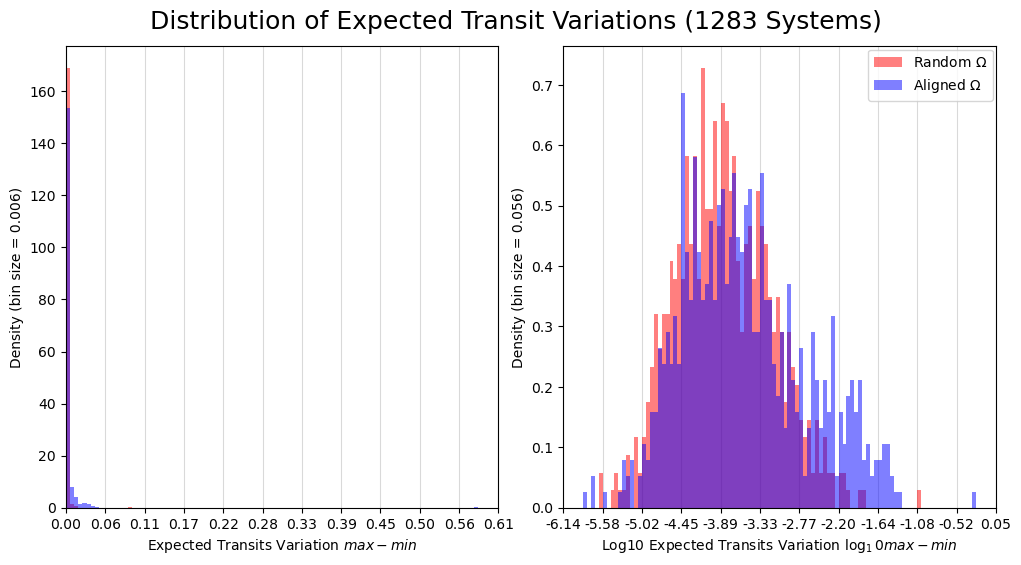

In [152]:
variations_data_file_path = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'multiplicities', 'expected_transits_variations.csv')
variations_save_file_path = os.path.join(os.pardir, os.pardir, 'results', 'multiplicities', 'expected_transits_variations')

title = 'Distribution of Expected Transit Variations ({n} Systems)'
x_label = r'Expected Transits Variation $max-min$'
x_log_label = r'Log10 Expected Transits Variation $\log_10{max-min}$'

plot_expected_transits_fractional_variations(variations_save_file_path, variations_data_file_path, title=title, x_label=x_label, x_log_label=x_log_label)

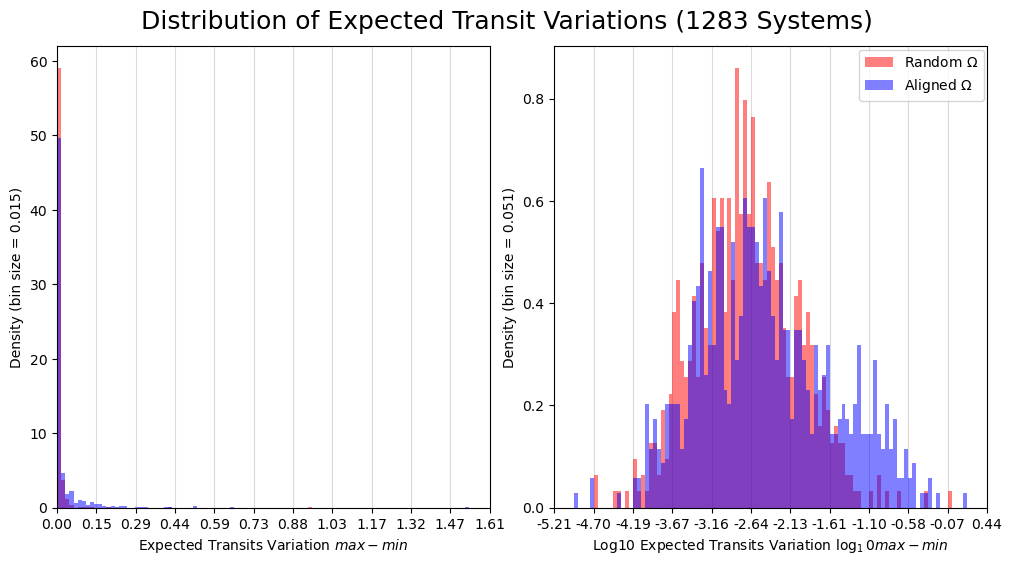

In [153]:
fractional_variations_data_file_path = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'multiplicities', 'expected_transits_fractional_variations.csv')
fractional_variations_save_file_path = os.path.join(os.pardir, os.pardir, 'results', 'multiplicities', 'expected_transits_fractional_variations')

plot_expected_transits_fractional_variations(fractional_variations_save_file_path, fractional_variations_data_file_path, title=title, x_label=x_label, x_log_label=x_log_label)